<a href="https://colab.research.google.com/github/sureshkuc/Freie-Universitat-Berlin/blob/main/statistics-for-small-sample-size/stats_sheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Given are the observations of the following two groups from Exercise Sheet 2:
Group 1:
Group 2:
x 11 = 3,
x 21 = 3,
x 12 = 4,
x 22 = 5,
x 13 = 4,
x 23 = 6,
x 14 = 5.
x 24 = 8,
x 25 = 9.
Calculate by hand the estimate of the exact Wilcoxon-Mann-Whitney test statistic R 2 W and
check the result with rank.two.samples in R and report the two-sided p-value. Compare the
result with Exercise 1 of Exercise Sheet 3.
Moreover, approximate the distribution of R 2 W under the null hypothesis by way of 200 000
random permutations and depict the results in a bar graph. In addition, compute the two-sided
p-value from this permutation distribution.
Now assume that there were no ties in the data. Again, approximate the distribution of R 2 W
under the null hypothesis by way of 200 000 random permutations, depict the results in a bar
graph and compute the two-sided p-value from this permutation distribution.
Compare and comment on the results.

In [4]:
install.packages("coin")
install.packages("rankFD")
library ( coin )
library ( rankFD )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘mvtnorm’, ‘multcomp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: survival



In [1]:
gp1 = c ( 3 , 4 , 4, 5 )
gp2 = c ( 3,5,6,8,10)
Rik = rank ( c ( gp1 , gp2 ))

In [2]:
Rik

[1] 1.5 3.5 3.5 5.5 1.5 5.5 7.0 8.0 9.0

In [5]:
data = data.frame ( y = c ( gp1 , gp2 ) ,
grp = factor ( c ( rep ( 1 ,4 ) , rep ( 2 ,5 ))))
rank.two.samples ( y ~ grp , data = data , wilcoxon = "exact" ,shift.int = FALSE )


 #------Nonparametric Test Procedures and Confidence Intervals for relative  effects-----# 
 
 - Alternative Hypothesis:  True relative effect p is unequal to 1/2 
 - Confidence level: 95 % 
 - Method = Logit - Transformation 
 
 #---------------------------Interpretation----------------------------------# 
 p(a,b) > 1/2 : b tends to be larger than a 
 #---------------------------------------------------------------------------# 
 


$Info
  Sample Size
1      1    4
2      2    5

$Analysis
  Effect Estimator Lower Upper     T p.Value
1 p(1,2)       0.8 0.318 0.972 1.265   0.206

$Wilcoxon
  Effect Estimator Statistic   p.Value      Shift Hodges.Lehmann Lower Upper
1 p(1,2)       0.8        31 0.1825397 delta(2-1)             NA    NA    NA

In [9]:
R2W = sum ( Rik [ 5 : 9 ])
R2W

[1] 31

In [11]:

R2WPermute = c()
for( i in 1 : 200000 ) {
Rikpermute = sample ( Rik ) # Random Permutation
R2WPermute [ i ] = sum ( Rikpermute [ 5 : 9 ]) # rank sum of permuted ran
}
pvalueleft = mean ( R2WPermute <= R2W )
pvalueright = mean ( R2WPermute >= R2W )
pvaluetwo = 2 * min ( pvalueleft , pvalueright )
print ( pvaluetwo )

[1] 0.19187


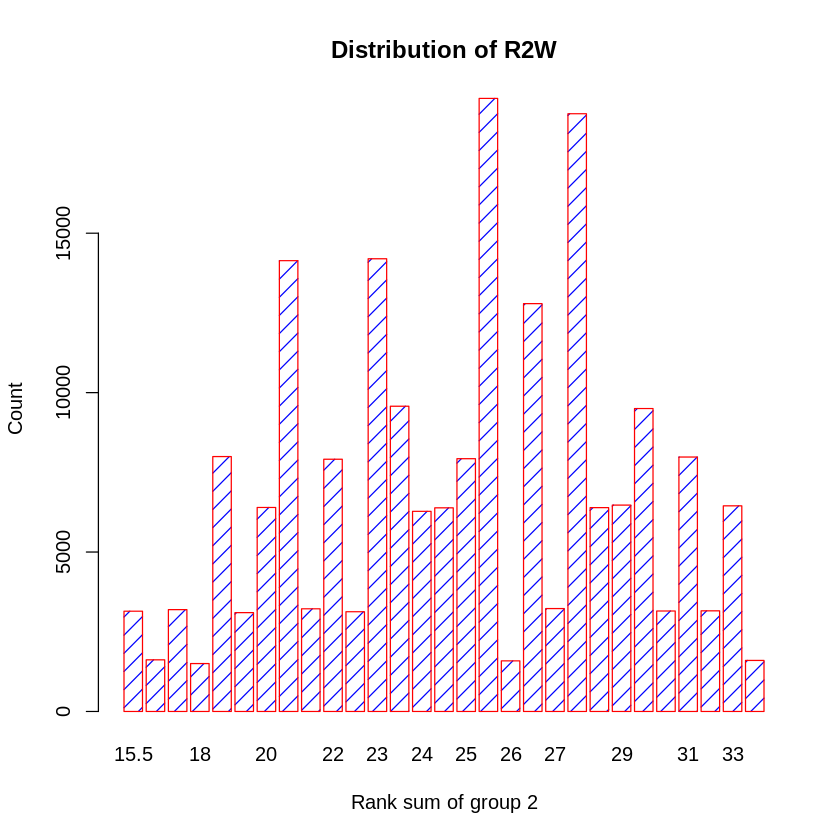

In [15]:

barplot(table(R2WPermute),
main="Distribution of R2W",
xlab="Rank sum of group 2",
ylab="Count",
border="red",
col="blue",
density=10
)

In [17]:
#assume no ties in data 
gp1 = c ( 1 , 2 , 3, 4 )
gp2 = c ( 5,6,7,8,9)
Rik = rank ( c ( gp1 , gp2 ))
R2W = sum ( Rik [ 5 : 9 ])
R2W

[1] 35

In [18]:
R2WPermute = c()
for( i in 1 : 200000 ) {
Rikpermute = sample ( Rik ) # Random Permutation
R2WPermute [ i ] = sum ( Rikpermute [ 5 : 9 ]) # rank sum of permuted ran
}
pvalueleft = mean ( R2WPermute <= R2W )
pvalueright = mean ( R2WPermute >= R2W )
pvaluetwo = 2 * min ( pvalueleft , pvalueright )
print ( pvaluetwo )

[1] 0.01592


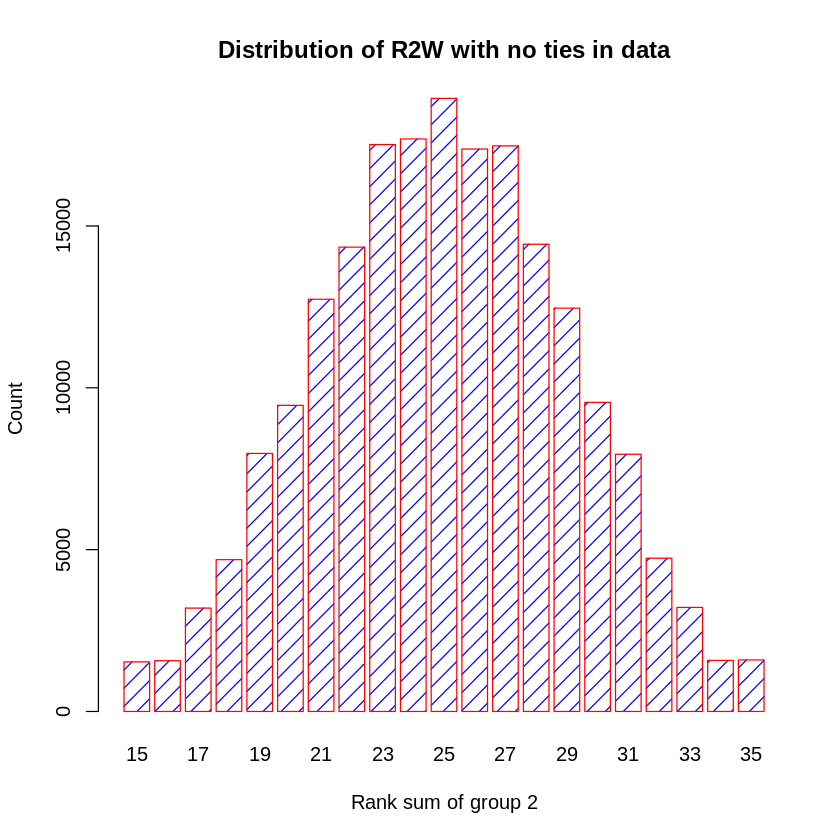

In [20]:
barplot(table(R2WPermute),
main="Distribution of R2W with no ties in data",
xlab="Rank sum of group 2",
ylab="Count",
border="red",
col="blue",
density=10
)